## Importing Required Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Downloading the MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Greyscale visualization of an image fom the dataset

2


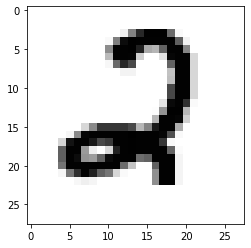

In [3]:
img_index = 6547 
print(y_train[img_index]) 
plt.imshow(x_train[img_index], cmap='Greys')

## Reshaping and Normalizing the Images

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Creating your own CNN model

### Adding layers into the model

In [6]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

### Fitting, Compilation and Evaluation


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train, epochs=10, validation_data= ((x_test, y_test)))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2031 - accuracy: 0.9394 - val_loss: 0.0804 - val_accuracy: 0.9753
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0825 - accuracy: 0.9750 - val_loss: 0.0583 - val_accuracy: 0.9817
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0503 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0573 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0599 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0549 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0646 - va

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9853


[0.05830424651503563, 0.9853000044822693]

## Graphical visualization of the results

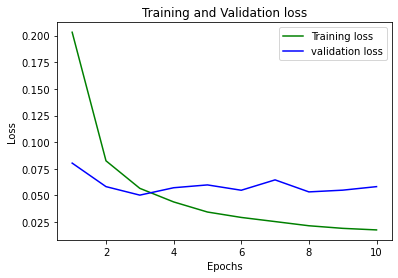

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

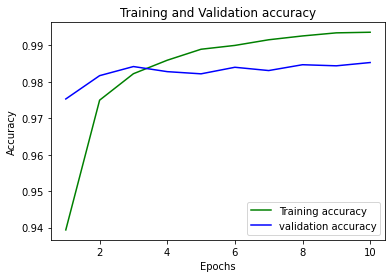

In [10]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Making individual predictions as a method of testing

9


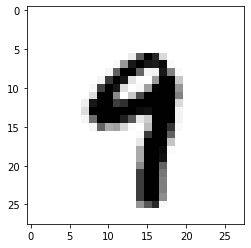

In [11]:
image_index = 3798
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

# **THANK YOU!!**